CT Data Generation for NN Training
==================================

This example demonstrates how to generate synthetic CT data for training
neural network models. If desired, a basic reconstruction can be
generated using filtered back projection (FBP).

In [1]:
# This scico project Jupyter notebook has been automatically modified
# to install the dependencies required for running it on Google Colab.
# If you encounter any problems in running it, please open an issue at
#   https://github.com/lanl/scico-data/issues

!pip install git+https://github.com/lanl/scico

# This scico project Jupyter notebook has been automatically modified
# to install the dependencies required for running it on Google Colab.
# If you encounter any problems in running it, please open an issue at
#   https://github.com/lanl/scico-data/issues

!pip install git+https://github.com/lanl/scico

import numpy as np

from scico import plot
from scico.flax.examples import load_ct_data
plot.config_notebook_plotting()

Read data from cache or generate if not available.

In [2]:
N = 256  # phantom size
train_nimg = 536  # number of training images
test_nimg = 64  # number of testing images
nimg = train_nimg + test_nimg
n_projection = 45  # CT views

trdt, ttdt = load_ct_data(train_nimg, test_nimg, N, n_projection, verbose=True)

2022-11-28 11:14:48,915	INFO worker.py:1518 -- Started a local Ray instance.


Platform                  :   gpu
Device count              :   8
Data generation    time[s]:   123.95
Sinogram           time[s]:     7.71
FBP                time[s]:     2.67
Storing data in path      :   ~/.cache/scico/examples/data
Set --training--          :   Size:   536
Set --testing --          :   Size:   64
Data range --images  --   :    Min:   0.00, Max: 1.00
Data range --sinogram--   :    Min:   0.00, Max: 0.67
Data range --FBP     --   :    Min:   0.00, Max: 1.00


Plot randomly selected sample.

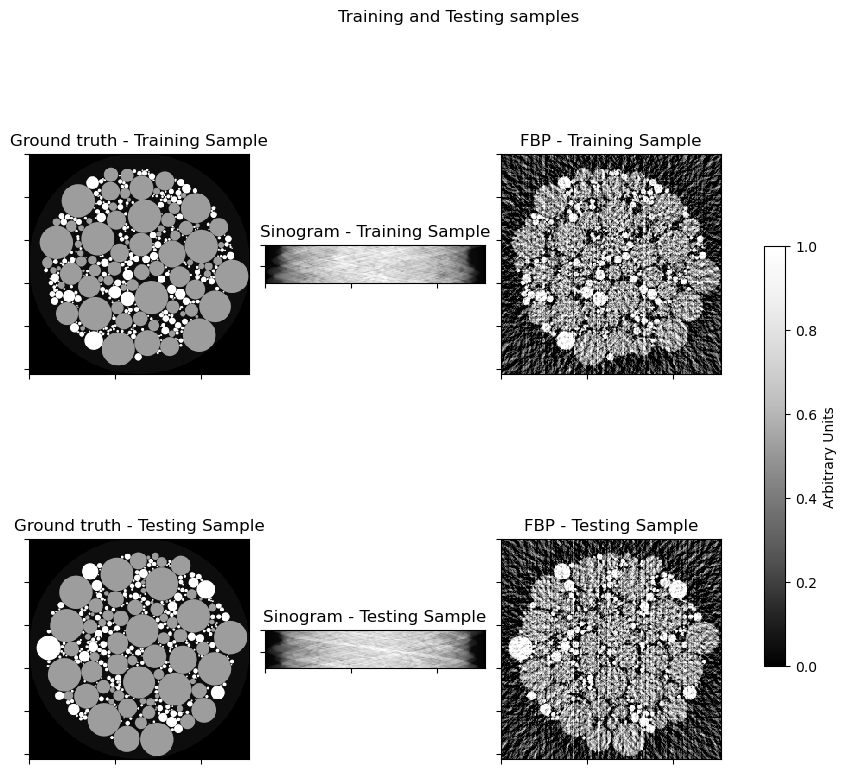

In [3]:
indx_tr = np.random.randint(0, train_nimg)
indx_te = np.random.randint(0, test_nimg)
fig, axes = plot.subplots(nrows=2, ncols=3, figsize=(9, 9))
plot.imview(
    trdt["img"][indx_tr, ..., 0], title="Ground truth - Training Sample", fig=fig, ax=axes[0, 0]
)
plot.imview(
    trdt["sino"][indx_tr, ..., 0], title="Sinogram - Training Sample", fig=fig, ax=axes[0, 1]
)
plot.imview(
    trdt["fbp"][indx_tr, ..., 0],
    title="FBP - Training Sample",
    fig=fig,
    ax=axes[0, 2],
)
plot.imview(
    ttdt["img"][indx_te, ..., 0],
    title="Ground truth - Testing Sample",
    fig=fig,
    ax=axes[1, 0],
)
plot.imview(
    ttdt["sino"][indx_te, ..., 0], title="Sinogram - Testing Sample", fig=fig, ax=axes[1, 1]
)
plot.imview(
    ttdt["fbp"][indx_te, ..., 0],
    title="FBP - Testing Sample",
    fig=fig,
    ax=axes[1, 2],
)
fig.suptitle(r"Training and Testing samples")
fig.tight_layout()
fig.colorbar(
    axes[0, 2].get_images()[0],
    ax=axes,
    shrink=0.5,
    pad=0.05,
    label="Arbitrary Units",
)
fig.show()